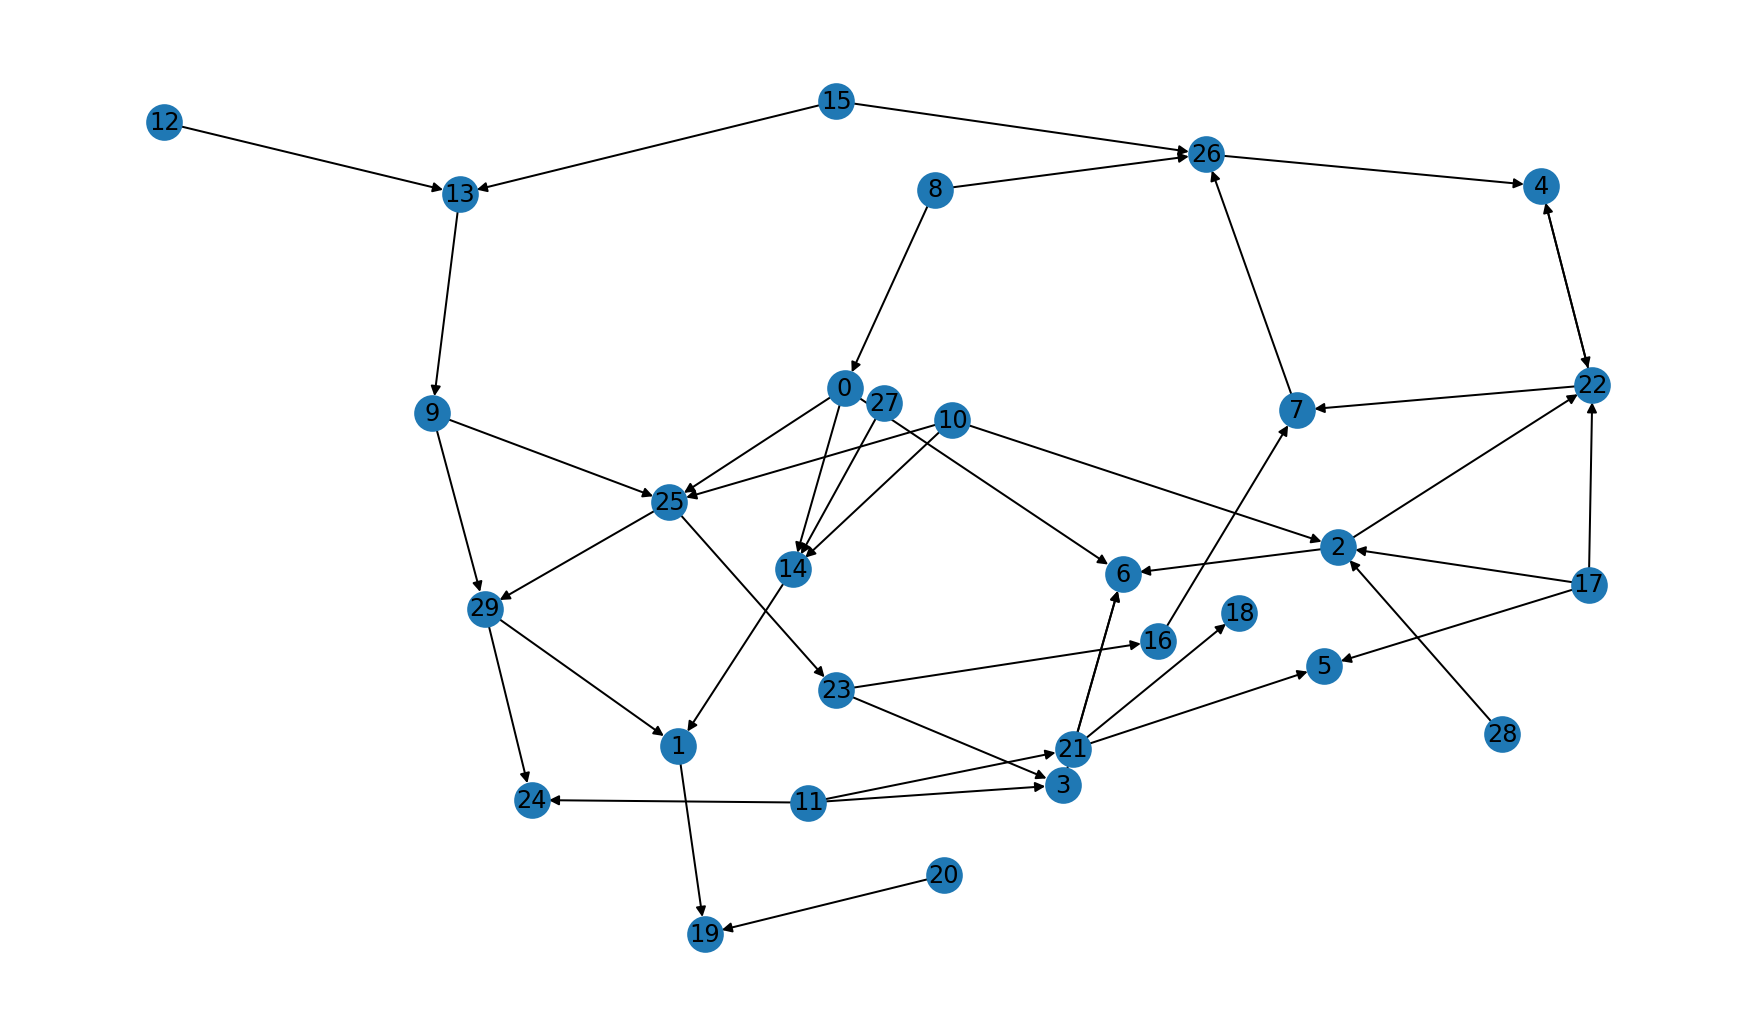

In [3]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels=True)

In [4]:
nx.pagerank(g)

{0: 0.01321914850756847,
 1: 0.04305614905051307,
 2: 0.0224184422385673,
 3: 0.020763573555365067,
 4: 0.1519409000092644,
 5: 0.015278038556628357,
 6: 0.04357199076624549,
 7: 0.08868962006965002,
 8: 0.009276594051426114,
 9: 0.027215223573378695,
 10: 0.009276594051426114,
 11: 0.009276594051426114,
 12: 0.009276594051426114,
 13: 0.021104257419853185,
 14: 0.023535500084085954,
 15: 0.009276594051426114,
 16: 0.018135203917936826,
 17: 0.009276594051426114,
 18: 0.01264966891920012,
 19: 0.05375946044542632,
 20: 0.009276594051426114,
 21: 0.011904963688854351,
 22: 0.15057445865003966,
 23: 0.02084377195458973,
 24: 0.025679331302227965,
 25: 0.02721686924658904,
 26: 0.0925438315518033,
 27: 0.009276594051426114,
 28: 0.009276594051426114,
 29: 0.03241025002937753}

In [16]:
page_rank = np.array(list(nx.pagerank(g).values())) 

In [14]:
import numpy as np

def Simulate_Surf(graph, iterations, a=0.85):
    current_location = np.random.choice(list(graph))
    counter = np.zeros(len(list(graph)))
    
    for i in range(iterations):
        counter[current_location] += 1
        if np.random.random() < a and len(list(graph.neighbors(current_location))) != 0:
            next_location = np.random.choice(list(graph.neighbors(current_location)))
            current_location = next_location
        else:
            current_location = np.random.choice(list(graph))
            
    counter = counter/iterations
    
    return counter

In [15]:
Simulate_Surf(g, 30)

array([0.06666667, 0.13333333, 0.03333333, 0.03333333, 0.1       ,
       0.03333333, 0.06666667, 0.03333333, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06666667,
       0.        , 0.03333333, 0.        , 0.        , 0.13333333,
       0.        , 0.        , 0.1       , 0.06666667, 0.        ,
       0.        , 0.03333333, 0.        , 0.        , 0.06666667])

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


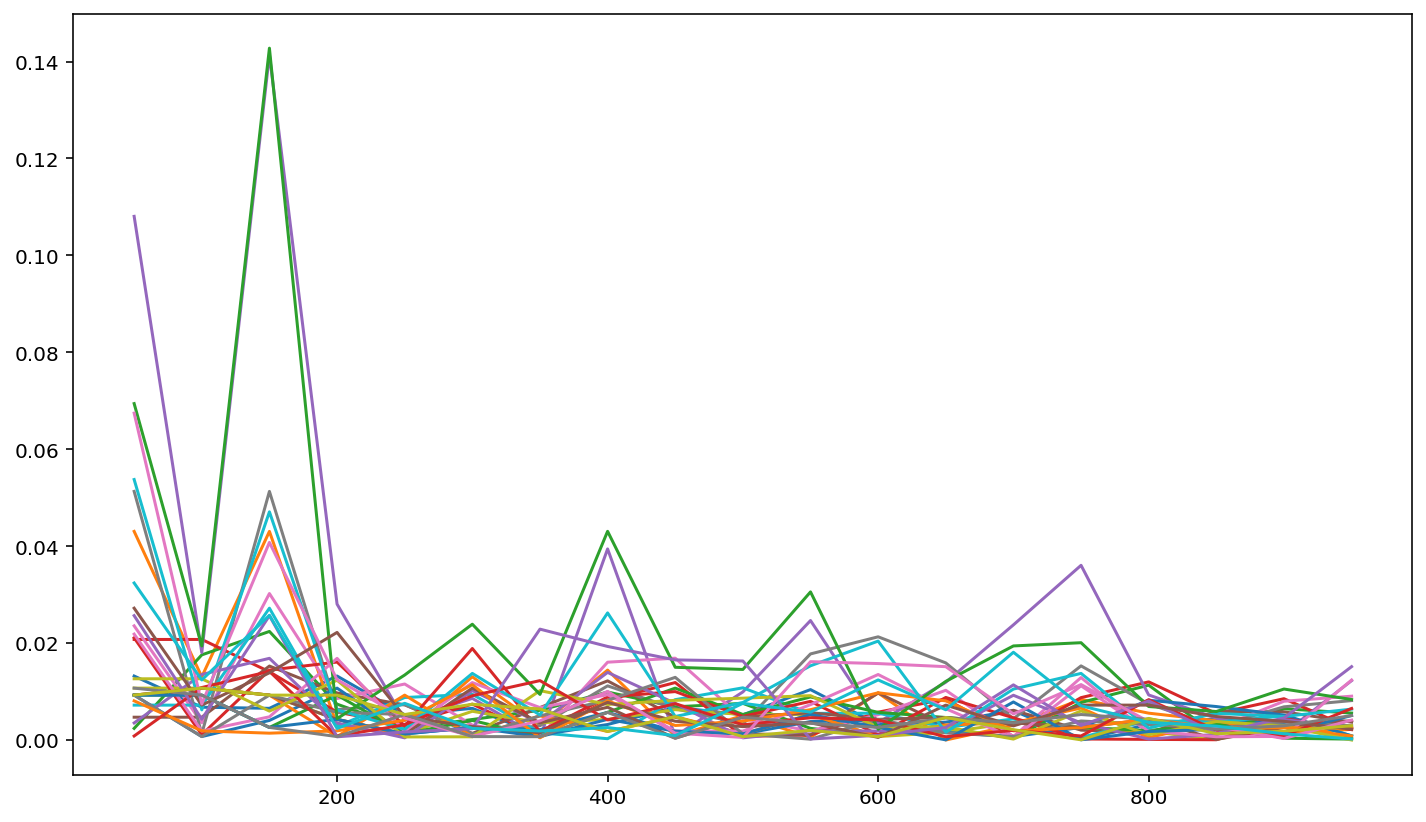

In [17]:
surfer = []

for i in range(0, 1000, 50):
    surfer.append(abs(Simulate_Surf(g, i) - page_rank))
    
import matplotlib.pyplot as plt

plt.plot(range(0, 1000, 50), surfer)